In [1]:
# importing the all main libraries
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df = pd.read_csv(r"C:\Users\rajpu\OneDrive\Desktop\real-time_translation_app\Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [6]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
# there are two columns whose data type is object we need to convert the object data tye into numeric type by using one hot encoding
# these two columns are Geography and Gender

In [7]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [8]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [9]:
# now doing one hot encoding
df = pd.get_dummies(df,columns = ["Geography","Gender"],drop_first = True)

In [10]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [11]:
# now seprating my training and testing data
x = df.drop(columns = ["Exited"])
y = df["Exited"]

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [15]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,686,32,6,0.00,2,1,1,179093.26,0,0,1
1561,632,42,4,119624.60,2,1,1,195978.86,1,0,1
1670,559,24,3,114739.92,1,1,0,85891.02,0,1,1
6087,561,27,9,135637.00,1,1,0,153080.40,0,0,0
6669,517,56,9,142147.32,1,0,0,39488.04,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,0,0,1
5191,682,58,1,0.00,1,1,1,706.50,0,0,0
5390,735,38,1,0.00,3,0,0,92220.12,0,0,0
860,667,43,8,190227.46,1,1,0,97508.04,0,0,1


In [16]:
x_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6252,596,32,3,96709.07,2,0,0,41788.37,1,0,1
4684,623,43,1,0.00,2,1,1,146379.30,0,0,1
1731,601,44,4,0.00,2,1,0,58561.31,0,1,0
4742,506,59,8,119152.10,2,1,1,170679.74,1,0,1
4521,560,27,7,124995.98,1,1,1,114669.79,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6412,602,53,5,98268.84,1,0,1,45038.29,1,0,0
8285,609,25,10,0.00,1,0,1,109895.16,0,0,1
7853,730,47,7,0.00,1,1,0,33373.26,0,0,0
1095,692,29,4,0.00,1,1,0,76755.99,0,0,1


In [17]:
y_train

9254    0
1561    0
1670    1
6087    1
6669    1
       ..
5734    0
5191    0
5390    1
860     1
7270    0
Name: Exited, Length: 8000, dtype: int64

In [18]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 2000, dtype: int64

In [19]:
# now doing feature scaling on my data set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

C:\Users\rajpu\anaconda7\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [22]:
x_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [23]:
x_test

array([[ 5.96000000e+02,  3.20000000e+01,  3.00000000e+00, ...,
         1.00000000e+00,  7.19424520e-17,  1.00000000e+00],
       [ 6.23000000e+02,  4.30000000e+01,  1.00000000e+00, ...,
         4.26325641e-17,  7.19424520e-17,  1.00000000e+00],
       [ 6.01000000e+02,  4.40000000e+01,  4.00000000e+00, ...,
         4.26325641e-17,  1.00000000e+00, -2.84217094e-17],
       ...,
       [ 7.30000000e+02,  4.70000000e+01,  7.00000000e+00, ...,
         4.26325641e-17,  7.19424520e-17, -2.84217094e-17],
       [ 6.92000000e+02,  2.90000000e+01,  4.00000000e+00, ...,
         4.26325641e-17,  7.19424520e-17,  1.00000000e+00],
       [ 6.28000000e+02,  3.90000000e+01,  1.00000000e+00, ...,
         1.00000000e+00,  7.19424520e-17,  1.00000000e+00]])

In [24]:
# Now creating my neural network model
model = Sequential()
model.add(Dense(11,activation = 'sigmoid',input_dim = 11))
model.add(Dense(1,activation = 'sigmoid'))


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 1)                 12        
                                                                 
Total params: 144 (576.00 Byte)
Trainable params: 144 (576.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model.compile(optimizer = "Adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [27]:
# now training my model on given data set
history = model.fit(x_train,y_train,batch_size = 50,epochs = 100,verbose =1,validation_split = 0.2)

Epoch 1/100


128/128 [==============================] - 1s 3ms/step - loss: 0.5315 - accuracy: 0.7934 - val_loss: 0.4904 - val_accuracy: 0.7987
Epoch 2/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4824 - accuracy: 0.7934 - val_loss: 0.4643 - val_accuracy: 0.7987
Epoch 3/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4660 - accuracy: 0.7936 - val_loss: 0.4503 - val_accuracy: 0.7987
Epoch 4/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4555 - accuracy: 0.7941 - val_loss: 0.4404 - val_accuracy: 0.8050
Epoch 5/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4476 - accuracy: 0.7977 - val_loss: 0.4329 - val_accuracy: 0.8119
Epoch 6/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4416 - accuracy: 0.8027 - val_loss: 0.4270 - val_accuracy: 0.8131
Epoch 7/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4372 - accuracy: 0.8091 - val_loss: 0.4230 - val_accuracy: 0.81

In [28]:
y_pred = model.predict(x_test)

63/63 [==============================] - 0s 855us/step


In [29]:
y_pred

array([[0.3479366 ],
       [0.14582072],
       [0.14582072],
       ...,
       [0.14582072],
       [0.14582072],
       [0.18283767]], dtype=float32)

In [30]:
y_pred = y_pred.argmax(axis=-1)

In [34]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8035

In [36]:
import matplotlib.pyplot as plt 


In [37]:
history

In [38]:
history.history

{'loss': [0.5314924120903015,
  0.48242923617362976,
  0.46604207158088684,
  0.4555429518222809,
  0.4476284682750702,
  0.4416179656982422,
  0.4372069537639618,
  0.43392086029052734,
  0.4315667748451233,
  0.4298396706581116,
  0.4285457134246826,
  0.4273112416267395,
  0.4261951744556427,
  0.42496752738952637,
  0.42395684123039246,
  0.42268791794776917,
  0.42154037952423096,
  0.42029425501823425,
  0.4189368784427643,
  0.41756975650787354,
  0.41630953550338745,
  0.41468358039855957,
  0.4133301079273224,
  0.41179341077804565,
  0.4102229177951813,
  0.40881583094596863,
  0.4072422385215759,
  0.40585699677467346,
  0.4043717682361603,
  0.4029185175895691,
  0.40140506625175476,
  0.4000173509120941,
  0.3986850380897522,
  0.39729201793670654,
  0.3959476351737976,
  0.3946373462677002,
  0.3934597671031952,
  0.3923876881599426,
  0.3910316228866577,
  0.3899976313114166,
  0.3890080749988556,
  0.3878606855869293,
  0.38682231307029724,
  0.38577282428741455,
  0.38

Text(0.5, 1.0, 'loss decrement')

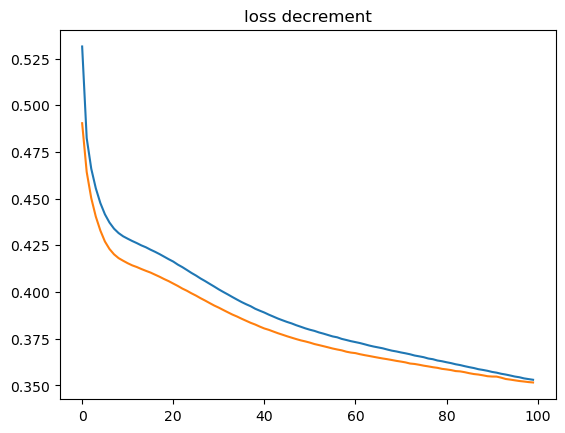

In [40]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("loss decrement")

Text(0.5, 1.0, 'accuracy increment')

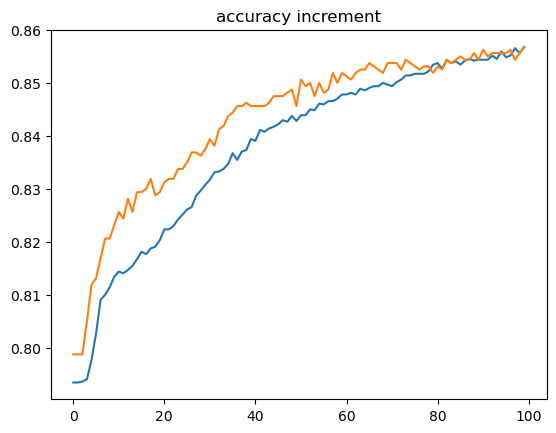

In [41]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("accuracy increment")